In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_data = pd.read_csv('all_data_1T.csv',
                      index_col = 0,
                      parse_dates = True)

In [3]:
def split_dt(df):
    dt = pd.DataFrame()
    dt['year'] = df.index.year
    dt['month'] = df.index.month
    dt['day'] = df.index.day
    dt['hour'] = df.index.hour
    dt['minute'] = df.index.minute
    return dt

def radial_to_features(df, target_df, feature, steps):  
    target_df[feature + '_sin'] = np.sin(df[feature]*(2.*np.pi/steps))
    target_df[feature + '_cos'] = np.cos(df[feature]*(2.*np.pi/steps))
    
dt_15T = split_dt(all_data)

encoded = pd.DataFrame()
encoded = pd.concat([encoded, pd.get_dummies(dt_15T.year, prefix = 'year')], axis = 1)
radial_to_features(dt_15T, encoded, 'month', 12)
radial_to_features(dt_15T, encoded, 'day', 31)
radial_to_features(dt_15T, encoded, 'hour', 24)
radial_to_features(dt_15T, encoded, 'minute', 60)
radials = pd.DataFrame()
radial_to_features(all_data, radials, 'DD_10', 365)
radial_to_features(all_data, radials, 'DDN_10', 365)
radial_to_features(all_data, radials, 'DD_STD_10', 365)
radial_to_features(all_data, radials, 'DDX_10', 365)


In [4]:
sensors = all_data[['151', '181', '192', '226', '262', '288', '317', '373', '380', '532']]
features1 = all_data[['DR_REGENM_10', 'RI_REGENM_10', 'U_BOOL_10', 'T_DRYB_10', 'TN_10CM_PAST_6H_10', 'T_DEWP_10', 'TN_DRYB_10', 'T_WETB_10', 
                                    'TX_DRYB_10', 'U_10', 'P_NAP_MSL_10', 'VV_10', 'AH_10', 'MOR_10', 'FF_10M_10']]
features2 = all_data[['FF_SENSOR_10', 'FF_10M_STD_10', 'FX_SENSOR_10', 'Q_GLOB_10', 'QN_GLOB_10', 'QX_GLOB_10', 'SQ_10']]
encoded.index = all_data.index
radials.index = all_data.index
features = sensors.join([encoded, features1, radials, features2])

In [5]:
features.to_csv('ML_input_1T.csv')

Text(0.5, 0, 'sin')

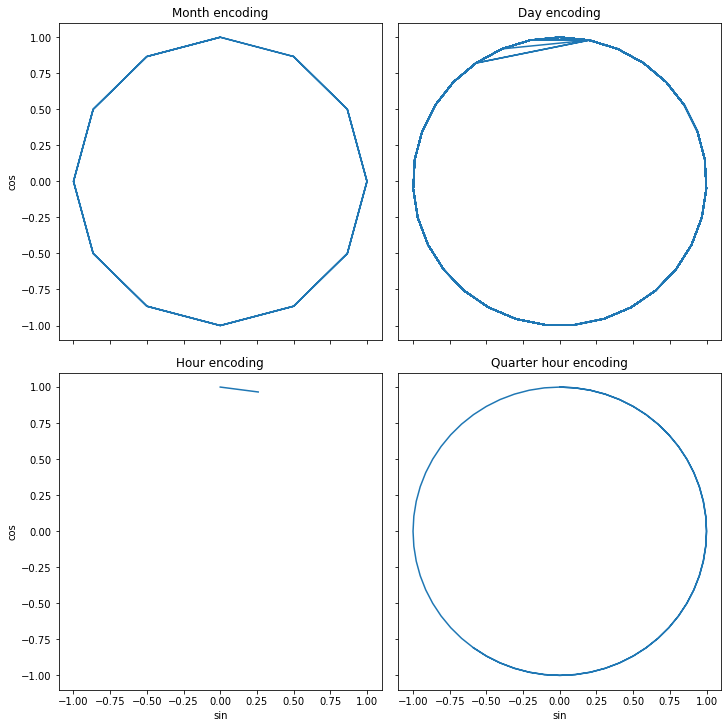

In [245]:
fig, axs = plt.subplots(2, 2,
                        sharey = True, sharex = True, 
                        constrained_layout = True,
                        figsize = (10,10))

axs[0,0].plot(encoded['month_sin'], encoded['month_cos'])
axs[0,0].set_title('Month encoding')
axs[0,0].set_ylabel('cos')

axs[0,1].plot(encoded['day_sin'], encoded['day_cos'])
axs[0,1].set_title('Day encoding')

axs[1,0].plot(encoded['hour_sin'][:97], encoded['hour_cos'][:97])
axs[1,0].set_title('Hour encoding')
axs[1,0].set_xlabel('sin')
axs[1,0].set_ylabel('cos')

axs[1,1].plot(encoded['minute_sin'][:97], encoded['minute_cos'][:97])
axs[1,1].set_title('Quarter hour encoding')
axs[1,1].set_xlabel('sin')

Text(0.5, 0, 'sin')

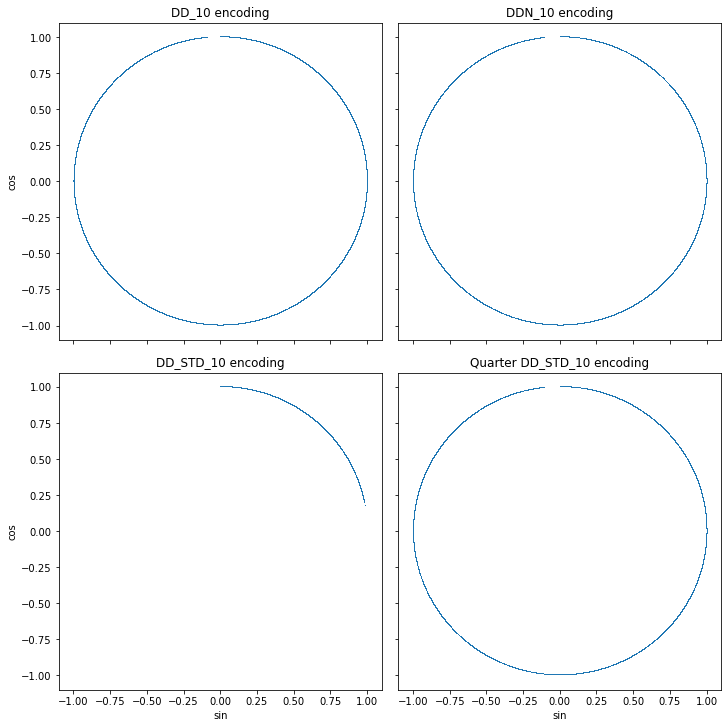

In [248]:
fig, axs = plt.subplots(2, 2,
                        sharey = True, sharex = True, 
                        constrained_layout = True,
                        figsize = (10,10))

axs[0,0].plot(radials['DD_10_sin'], radials['DD_10_cos'], ',')
axs[0,0].set_title('DD_10 encoding')
axs[0,0].set_ylabel('cos')

axs[0,1].plot(radials['DDN_10_sin'], radials['DDN_10_cos'], ',')
axs[0,1].set_title('DDN_10 encoding')

axs[1,0].plot(radials['DD_STD_10_sin'], radials['DD_STD_10_cos'], ',')
axs[1,0].set_title('DD_STD_10 encoding')
axs[1,0].set_xlabel('sin')
axs[1,0].set_ylabel('cos')

axs[1,1].plot(radials['DDX_10_sin'], radials['DDX_10_cos'], ',')
axs[1,1].set_title('Quarter DD_STD_10 encoding')
axs[1,1].set_xlabel('sin')

In [221]:
def print_stats(df):
    print('df.info output:\n\n')
    print(df.info())
    print('df.describe output:\n\n')
    print(df.describe())
    print('df.isna.sum output:\n\n')
    print(df.isna().sum())
print_stats(features)
print_stats(all_data[['151', '181', '192', '226', '262', 
                     '288', '317', '373', '380', '532'
                    ]])

df.info output:


<class 'pandas.core.frame.DataFrame'>
Index: 420864 entries, 2015-01-01 00:00:00 to 2017-12-31 23:45:00
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   151                 95303 non-null   float64
 1   181                 87057 non-null   float64
 2   192                 95505 non-null   float64
 3   226                 92762 non-null   float64
 4   262                 85884 non-null   float64
 5   288                 79971 non-null   float64
 6   317                 83984 non-null   float64
 7   373                 92175 non-null   float64
 8   380                 78845 non-null   float64
 9   532                 95041 non-null   float64
 10  year_2015           105216 non-null  float64
 11  year_2016           105216 non-null  float64
 12  year_2017           105216 non-null  float64
 13  month_sin           105216 non-null  float64
 14  month_cos           105216 non-null  flo